<a href="https://colab.research.google.com/github/wjdrnqja9/TIL/blob/main/deep_learning/2_1_TF1_Classification_(2Layers_baseline).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![image.png](attachment:image.png)

#### MNIST Introduction
- MNIST (Mixed National Institute of Standards and Technology database)
- **손글씨 숫자(0~9) 이미지 데이터**
- 각 이미지는 **가로와 세로가 각각 28px, 흑백 이미지**로 만들어져 있음
- Training data == 55,000장, Validation data == 5,000장, Test data = 10,000장

![image.png](attachment:image.png)

#### 1. Prepare the data

In [4]:
pip install --upgrade tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 511.7 MB 6.0 kB/s 
     |████████████████████████████████| 5.8 MB 33.4 MB/s 
     |████████████████████████████████| 1.6 MB 38.5 MB/s 
     |████████████████████████████████| 438 kB 42.0 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.8.0
    Uninstalling tensorboard-2.8.0:
      Successfully uninstalled tensorboard-2.8.0
  Attempting uninstall: keras
    Found existing installation: keras 2.8.0
    Uninstalling keras-2.8.0:
      Successfully uninstalled keras-2.8.0
  Attempting uninstall: gast
    Found existing installation: gast 0.5.3
    Uninstalling gast-0.5.3:
      Successfully uninstalled gast-0.

In [1]:
from tensorflow.keras import datasets # MNIST Data는 Tensorflow 2.x를 통해 가져올 수 있습니다.

(train_data, train_label), (test_data, test_label) = datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [2]:
print(train_data.shape) # # of training data == 60000, each data = 28px * 28px
print(test_data.shape) # # of test data == 10000

(60000, 28, 28)
(10000, 28, 28)


In [5]:
train_data[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [16]:
import pandas as pd

In [12]:
train_label

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [21]:
pd.DataFrame(train_data[0])

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,175,26,166,255,247,127,0,0,0,0
6,0,0,0,0,0,0,0,0,30,36,...,225,172,253,242,195,64,0,0,0,0
7,0,0,0,0,0,0,0,49,238,253,...,93,82,82,56,39,0,0,0,0,0
8,0,0,0,0,0,0,0,18,219,253,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,80,156,...,0,0,0,0,0,0,0,0,0,0


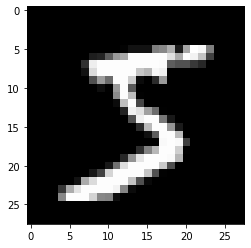

In [3]:
import matplotlib.pyplot as plt

plt.imshow(train_data[0], cmap='gray') # 60000장의 train data 중 첫번째 data

#### Normalization

In [22]:
# 각 이미지(28px * 28px)는 0~255 사이의 숫자로 이루어져 있습니다.

print(train_data.min())
print(train_data.max()) 

0
255


In [23]:
# 각 이미지를 [28행 x 28열]에서 [1행 x 784열]로 펼쳐줍니다. 
# 각 이미지 내의 pixel 값을 [0~255]에서 [0~1]로 바꿔줍니다.

train_data = train_data.reshape(60000, 784) / 255.0
test_data = test_data.reshape(10000, 784) / 255.0

In [24]:
train_data.shape

(60000, 784)

#### One-hot encoding

In [25]:
# 각 이미지에 대한 label은 integer value로 이루어져 있습니다.

train_label

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [26]:
# 각 label을 integer value에서 one-hot vector로 변경해줍니다. (Tensorflow 2.x 활용)

from tensorflow.keras import utils

train_label = utils.to_categorical(train_label) # 0~9 -> one-hot vector
test_label = utils.to_categorical(test_label) # 0~9 -> one-hot vector

In [27]:
# 기존의 integer label들이 아래와 같은 one-hot vector들로 변경된 것을 확인할 수 있습니다.

import pandas as pd

pd.DataFrame(train_label).head(3)

,0,1,2,3,4,5,6,7,8,9
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
train_label[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

![image.png](attachment:image.png)

#### 2. Build the model

In [28]:
# import tensorflow as tf

import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' # https://stackoverflow.com/questions/35911252/disable-tensorflow-debugging-information
tf.logging.set_verbosity(tf.logging.ERROR)

Instructions for updating:
non-resource variables are not supported in the long term


In [31]:
from logging import PlaceHolder
# 데이터가 흘러들어올 접시(placeholder) 만들기 

X = tf.placeholder(tf.float32, [None, 784]) # [# of batch data, # of features(columns) == 총 784개의 열]
Y = tf.placeholder(tf.float32, [None, 10]) # 0~9 == 총 10개의 열

In [32]:
# 모든 Parameter Theta는 Variable로 선언

W1 = tf.Variable(tf.random_normal([784, 256], stddev=0.01))  # 첫 번째 히든레이어에 노드(퍼셉트론) 256개
L1 = tf.nn.relu(tf.matmul(X, W1))

In [33]:
W2 = tf.Variable(tf.random_normal([256, 256], stddev=0.01))
L2 = tf.nn.relu(tf.matmul(L1, W2))

In [34]:
W3 = tf.Variable(tf.random_normal([256, 10], stddev=0.01))
model = tf.matmul(L2, W3) # 마지막 층도 행렬곱까지만 진행

#### 3. Set the criterion

In [35]:
# cost = tf.losses.mean_squared_error(Y, model) # for Regression

cost = tf.losses.softmax_cross_entropy(Y, model) # for Classification, "cross-entropy" after "softmax"

optimizer = tf.train.AdamOptimizer(0.001).minimize(cost) # Select optimizer & connect with cost function (recommended start : "Adam")

#### 4. Train the model

In [40]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

In [37]:
# Gradient descent를 적용하기 전까지 한번에 밀어넣는 데이터의 수 지정 (Batch size == 하나의 데이터 덩어리 내 데이터 수)

batch_size = 100
total_batch = int(len(train_data) / batch_size)
print(total_batch)

600


In [ ]:
# import tqdm 
# for epoch in tqdm.notebook.tqdm(range(15)):

In [38]:
15*600

9000

In [41]:


for epoch in range(15):
    
    
    total_cost = 0 # 매 epoch 마다의 평균 에러 값 계산을 위해 활용됩니다.
    batch_idx = 0 # 매 batch 마다 꺼낼 데이터의 시작 index 값 지정을 위해 활용됩니다.
    
    for i in range(total_batch): # iterate over # of batches
        
        # Training data(60000장)에서 batch_size(100개) 만큼 순서대로 꺼내어 학습에 활용해줍니다.
        batch_x = train_data[ batch_idx : batch_idx + batch_size ]
        batch_y = train_label[ batch_idx : batch_idx + batch_size ]
        
        sess.run(optimizer, feed_dict={X: batch_x, Y: batch_y}) # 먹여줄(feed) 딕셔너리(dict)
        
        # 이번 batch를 기준으로 계산이 끝난 Cross-entropy 값을 total_cost에 더해줍니다. (epoch 종료 후 평균을 냅니다.)
        batch_cost = sess.run(cost, feed_dict={X: batch_x, Y: batch_y})
        total_cost = total_cost + batch_cost
        
        # 다음 for loop에서 꺼낼 데이터의 시작 index 번호를 batch_size(100) 만큼 증가시킵니다.
        batch_idx += batch_size  # 0 += 100
    
    
    # (이번 epoch가 종료되었을 시점의) training data 기준 Cross-entropy 값을 계산합니다.
    training_cost = total_cost / total_batch
    
    # (이번 epoch가 종료되었을 시점의) test data 기준 Cross-entropy 값을 계산합니다.
    test_cost = sess.run(cost, feed_dict={X: test_data, Y: test_label}) 
    
    
    print('Epoch: {}'.format(epoch + 1), 
          '|| Avg. Training cost = {:.3f}'.format(training_cost), 
          '|| Current Test cost = {:.3f}'.format(test_cost))

print('Learning process is completed!')

Epoch: 1 || Avg. Training cost = 0.384 || Current Test cost = 0.196
Epoch: 2 || Avg. Training cost = 0.138 || Current Test cost = 0.118
Epoch: 3 || Avg. Training cost = 0.082 || Current Test cost = 0.116
Epoch: 4 || Avg. Training cost = 0.054 || Current Test cost = 0.107
Epoch: 5 || Avg. Training cost = 0.037 || Current Test cost = 0.124
Epoch: 6 || Avg. Training cost = 0.026 || Current Test cost = 0.168
Epoch: 7 || Avg. Training cost = 0.020 || Current Test cost = 0.106
Epoch: 8 || Avg. Training cost = 0.015 || Current Test cost = 0.090
Epoch: 9 || Avg. Training cost = 0.013 || Current Test cost = 0.137
Epoch: 10 || Avg. Training cost = 0.009 || Current Test cost = 0.079
Epoch: 11 || Avg. Training cost = 0.008 || Current Test cost = 0.084
Epoch: 12 || Avg. Training cost = 0.006 || Current Test cost = 0.082
Epoch: 13 || Avg. Training cost = 0.004 || Current Test cost = 0.094
Epoch: 14 || Avg. Training cost = 0.005 || Current Test cost = 0.104
Epoch: 15 || Avg. Training cost = 0.005 || 

#### 5. Test the model

In [42]:
# Test data에서 첫번째 행(1행 x 784열)을 꺼내는 코드입니다.
# (Scikit-learn의 첫번째 실습이었던 Linear-regression 실습에서 하나의 열을 꺼낼 때 행렬 형태로 꺼내던 방법을 떠올려보세요.)

test_data[0:1, :].shape 

(1, 784)

In [44]:
test_data[0, :].reshape(1,784).shape

(1, 784)

In [47]:
# 데이터 1건에 대하여 마지막 output layer의 출력값을 얻을 수 있습니다. (softmax 적용 전의 10개 숫자)

prediction = sess.run(tf.nn.softmax(model), feed_dict={X: test_data[0:1, :]}) 
pd.DataFrame(prediction)

,0,1,2,3,4,5,6,7,8,9
0,7.534487e-12,5.394589e-11,3.936616e-11,2.238083e-12,1.291913e-19,2.512034e-15,2.479067e-23,1.0,9.832466e-16,1.789539e-09


In [48]:
# 위 10개의 숫자 중 가장 큰 값의 index 번호를 얻어냅니다 (np.argmax와 동일)

sess.run(tf.argmax(model, 1), feed_dict={X: test_data[0:1, :]}) # argmax 함수의 두번째 argument "1"은 행 방향을 의미합니다.

array([7])

In [49]:
# 실제 정답인 test label 중 첫번째 행의 가장 큰 값의 index 번호를 얻어내어 비교함으로써 모델이 맞췄는지 확인이 가능합니다. 

sess.run(tf.argmax(Y, 1), feed_dict={Y: test_label[0:1, :]})

array([7])

#### 정확도 계산 (tf.argmax / tf.equal / tf.cast / tf.reduce_mean 활용)

In [50]:
# tf.argmax([0.1 0 0 0.7 0 0.2 0 0 0 0]) -> 3 (가장 큰 값의 index를 return)

# 6 8 4  2
# 6 8 10 0
# 1 1 0  0

is_correct = tf.equal(tf.argmax(model, 1), tf.argmax(Y, 1)) # model : 예측값, Y : 실제 정답

accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32)) # 자료형 변환(type-"cast") 후, 차원을 줄이면서(reduce) 평균(mean) 계산

In [51]:
# 10,000건의 Test data 전체에 대해 모델의 정확도를 계산합니다.

print('정확도 :', sess.run(accuracy,
                        feed_dict={X: test_data,
                                   Y: test_label}))

정확도 : 0.9793


In [56]:
prediction = sess.run(model, feed_dict={X:test_data})
pd.DataFrame(prediction)

,0,1,2,3,4,5,6,7,8,9
0,-6.260592,-4.292102,-4.607175,-7.474462,-24.142057,-14.266747,-32.700642,19.350933,-15.204736,-0.790367
1,-17.811394,1.243150,21.278397,2.955528,-30.574621,-22.184124,-27.260511,-2.951427,-12.005220,-34.713253
2,-17.232935,13.270921,-5.982710,-12.170259,-4.088940,-7.174406,-5.964464,-2.815078,-4.111046,-12.450068
3,17.598541,-8.704394,-9.552367,-13.821314,-13.994680,-12.824309,-2.951312,-7.047921,-14.867949,1.326579
4,-13.875040,-11.058562,-8.243350,-19.065474,12.465434,-16.609783,-12.287358,-1.085438,-11.915589,5.037427
...,...,...,...,...,...,...,...,...,...,...
9995,-15.218574,-2.671400,20.697046,-1.009118,-30.762398,-25.041546,-34.422085,-1.975675,-7.015098,-13.653415
9996,-22.661520,-10.989481,-14.940716,17.921993,-24.898151,3.559968,-48.848282,-23.777479,-10.675258,11.050408
9997,-25.077869,-8.931375,-19.214140,-22.672199,22.797714,-15.909310,-17.136904,-4.933375,-6.918561,-1.403869
9998,-18.395298,-16.327442,-31.070333,-12.906080,-28.495157,28.206236,-4.640089,-20.891037,2.737681,-25.756786


In [57]:
prediction = sess.run(tf.argmax(model, axis=1), feed_dict={X:test_data})
pd.DataFrame(prediction)

,0
0,7
1,2
2,1
3,0
4,4
...,...
9995,2
9996,3
9997,4
9998,5


In [52]:
# 모델 예측 결과값

predicted_labels = sess.run(tf.argmax(model, 1), feed_dict={X: test_data, Y: test_label})
print(list(predicted_labels)[:10])

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9]


In [53]:
# 실제 정답 

import numpy as np
print(np.argmax(test_label, 1)[:10])

[7 2 1 0 4 1 4 9 5 9]
